In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from random import randint

# This is Mohamed Fawzy solving challenge 1 
**Let us go through details**.

In [2]:
X_test = pd.read_csv("../input/ahcd1/csvTestImages 3360x1024.csv")
y_test = pd.read_csv("../input/ahcd1/csvTestLabel 3360x1.csv")
X_train = pd.read_csv("../input/ahcd1/csvTrainImages 13440x1024.csv")
y_train = pd.read_csv("../input/ahcd1/csvTrainLabel 13440x1.csv")

 # **Exploratory Data Analysis**

In [3]:
print("\n Training labels null check\n")
pd.DataFrame(y_train).info()
print("\n","="*50, "\n\n Test labels null check\n")
y_test.info()


 Training labels null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       13439 non-null  int64
dtypes: int64(1)
memory usage: 105.1 KB


 Test labels null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3359 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1 
15    480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
28    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
1     479
dtype: int64

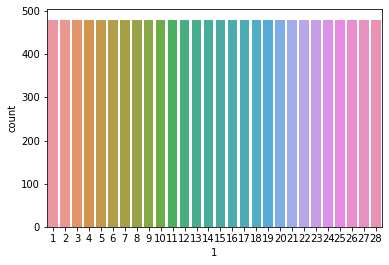

In [4]:
g= sns.countplot(y_train['1'])
y_train.value_counts()
#I was making sure that there is no label domination in my dataset

as we can see here labels are balanced.

**We'll use CNN model ... so we need to normalize data as it is single channel grayscale images **

In [5]:
X_train = X_train / 255.0
X_test= X_test / 255.0

Here I'll reshape the data to 3D matrices to get the data ready for the model as I imported the data using Pandas dataframe

In [6]:
X_train = X_train.values.reshape(-1,32,32,1)
print("\nDone reshaping training data")
X_test = X_test.values.reshape(-1,32,32,1)
print("\nDone reshaping testing data")


Done reshaping training data

Done reshaping testing data


In [7]:
#here I did one hot encoding to avoid priorities and ranking of the model as it is originally label encoded
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 29)
y_test = to_categorical(y_test, num_classes = 29)

In [8]:
print(X_train.shape, y_train.shape)

(13439, 32, 32, 1) (13439, 29)


Here I built my CNN : I actually searched for what's the best cnn architecture for mnist online and here what came out : https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist/notebook
There are experiments for every phase of convolution and choosing what's best.

In [9]:
model = Sequential()
model.add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(32,32,1)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(29, activation='softmax'))


2022-03-18 20:54:33.809886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 20:54:33.910927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 20:54:33.911625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 20:54:33.913371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Adding a callback to stop the training wherever I want (It is used to stop training or act in a certain way when it detects a metric from logs) I can use it to avoid overfitting.

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc=logs.get('accuracy')

    if(acc >  0.998):

      print("\n Acheived wanted accuracy:",round(acc,3)," Stopping the training ")
      self.model.stop_training = True



Now let's choose an optimizer for our model.I chose Adam as it is a combination of 2 optimizers, AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle tricky gradients.

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=80,callbacks=myCallback(), validation_data=(X_test, y_test), shuffle=True)

2022-03-18 20:54:36.896781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-03-18 20:54:38.236317: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


420/420 [==============================] - 9s 4ms/step - loss: 1.9659 - accuracy: 0.3903 - val_loss: 0.8451 - val_accuracy: 0.7309
Epoch 2/80
420/420 [==============================] - 2s 4ms/step - loss: 0.9119 - accuracy: 0.6865 - val_loss: 0.5359 - val_accuracy: 0.8297
Epoch 3/80
420/420 [==============================] - 2s 4ms/step - loss: 0.6546 - accuracy: 0.7768 - val_loss: 0.4172 - val_accuracy: 0.8628
Epoch 4/80
420/420 [==============================] - 2s 4ms/step - loss: 0.5194 - accuracy: 0.8246 - val_loss: 0.3338 - val_accuracy: 0.8910
Epoch 5/80
420/420 [==============================] - 2s 5ms/step - loss: 0.4424 - accuracy: 0.8494 - val_loss: 0.3034 - val_accuracy: 0.8991
Epoch 6/80
420/420 [==============================] - 2s 4ms/step - loss: 0.3777 - accuracy: 0.8678 - val_loss: 0.2687 - val_accuracy: 0.9166
Epoch 7/80
420/420 [==============================] - 2s 4ms/step - loss: 0.3291 - accuracy: 0.8902 - val_loss: 0.2961 - val_accuracy: 0.9053
Epoch 8/80
420/42

In [12]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.9547


[0.3551535904407501, 0.9547484517097473]

I never tried over 100 epochs for real...

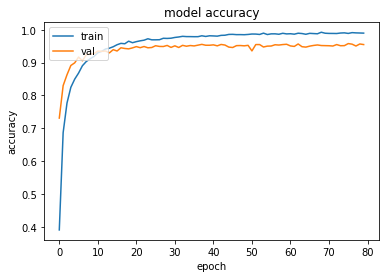

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


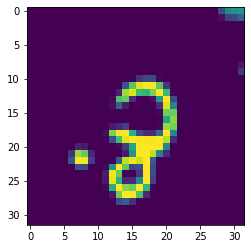

In [14]:
index = randint(0,3359)
classifications = model.predict(X_test)
plt.imshow(X_test[index])
print(y_test[index])

In [15]:
model.save("HACR")

2022-03-18 20:57:09.263538: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
